# Análise Exploratória de Dados

Após realizar o pré-processamento dos dados descrito na seção anterior, a sequência natural é realizar a Análise Exploratória dos Dados (em inglês, *Exploratory Data Analysis* - EDA). Esta etapa consiste em **entender melhor um conjunto de dados através de estatísticas descritivas e de gráficos visuais**, sendo bastante utilizada em Ciência de Dados para levantar hipóteses e responder alguns questionamentos relativos aos dados em si. Apesar de relativamente simples, a análise exploratória é muito importante e pode levar bastante tempo, uma vez que este processo tem bastante ligação com a etapa de pré-processamento, podendo exigir que alguns passos desta etapa sejam reexecutados para assegurar uma melhor qualidade dos dados.

Uma das principais vantagens de se utilizar o Jupyter em projetos de Ciência de Dados é justamente a sua estrutura em células. Tal vantagem é evidenciada principalmente nas etapas de análise exploratória e visualização de dados (próxima seção), pois a fácil visualização em formato tabular ou gráfico permite à pessoa cientista uma rápida análise descritiva do conjunto de dados. Dessa forma, a depender dos resultados, é possível corrigir, descartar ou lidar com os dados de forma apropriada. Além disso, é importante ressaltar que não existe uma única sequência de passos correta para descrever e lidar com dados. Cabe à pessoa cientista de dados escolher, a partir de um entendimento prévio e do arcabouço prático disponível, escolher as melhores técnicas para a tarefa de análise.

<br>
<p style="text-align: center;">

</p>

Apesar de não haver uma sequência definida de etapas para a realização de uma análise exploratória, nesta seção apresentamos os passos que são comumente utilizados neste tipo de abordagem. Os principais tópicos abordados incluem como a exploração e descrição inicial de um *DataFrame*, estatísticas básicas para variáveis numéricas e categóricas, além da análise de distribuições e de correlação de valores. Aqui, utilizaremos a tabela *Tracks* do nosso conjunto de dados, que contém informações relevantes sobre as canções que entraram na parada global de sucesso do Spotify no ano de 2020.

O conteúdo deste notebook está organizado de acordo com os tópicos da seção 1.2.6. (Análise Exploratória de Dados) do Capítulo:

- [1.2.6.1. Exploração Inicial](#exploracao-inicial)
    - [Amostras de Dados](#amostras)
    - [Dimensões e Tipos](#dimensoes)
- [1.2.6.2. Estatísticas Básicas para Dados Numéricos](#stats-numericos)
- [1.2.6.3. Estatísticas Básicas para Dados Categóricos](#stats-categoricos)
- [1.2.6.4. Distribuições](#distribuicoes)
    - [*Boxplots*](#boxplots)
    - [Histogramas](#histogramas)
- [1.2.6.5. Correlações](#correlacoes)

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 6)

In [2]:
# Criando dataframe a partir de um arquivo TSV
df = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv')

<a id="exploracao-inicial"></a>
## Exploração Inicial

A etapa de exploração inicial é simples, mas muito importante para a pessoa cientista se familiarizar com o conteúdo de seu conjunto de dados. Se na seção anterior o foco estava no pré-processamento dos dados para deixá-los prontos para a análise, aqui é onde serão feitas as primeiras análises visuais sobre o conjunto de dados. Assim, apresentamos técnicas de amostragem de dados, e verificamos informações básicas sobre o *DataFrame* como as dimensões e os tipos das variáveis.

<a id="amostras"></a>
### Amostras de Dados

Uma das primeiras ações ao lidar com um novo conjunto de dados é verificar uma amostra das instâncias presentes neste conjunto. Assim, é possível entender mais a fundo o conteúdo das colunas e que tipo de informação se espera em cada uma delas. O Pandas possui algumas funções que nos permitem visualizar tais amostras, e a sua utilização em um ambiente Jupyter facilita ainda mais essa tarefa ao exibir uma visualização simples e amigável do *DataFrame* ao final de cada célula. Um exemplo é a função `head()`, que permite a visualização das primeiras linhas de um *DataFrame*.

In [3]:
df.head() # Mostrando os primeiros registros do dataframe (5, por padrão)

,song_id,song_name,artist_id,...,speechiness,valence,tempo
0,2rRJrJEo19S2J82BDsQ3F7,Falling,['7uaIm6Pw7xplS8Dy06V6pT'],...,0.0364,0.236,127.087
1,3BYIzNZ3t9lRQCACXSMLrT,Venetia,['4O15NlyKLIASxsJ0PrXPfz'],...,0.1750,0.562,142.933
2,1g3J9W88hTG173ySZR6E9S,Tilidin Weg,['1aS5tqEs9ci5P9KD9tZWa6'],...,0.2330,0.171,109.090
3,75pQqzwgCjUOSSy5CpmAjy,Pero Ya No,['4q3ewBCX7sLwd24euuV69X'],...,0.1180,0.742,147.982
4,7kDUspsoYfLkWnZR7qwHZl,my ex's best friend (with blackbear),"['6TIYQ3jFPwQSRmorSezPxX', '2cFrymmkijnjDg9SS9...",...,0.0434,0.298,124.939


Esta função é definida de forma padrão para exibir somente as cinco primeiras linhas do *DataFrame*. No entanto, pode-se usar o parâmetro `n` da função `head()` para personalizar a saída. No exemplo a seguir, optou-se por exibir somente os dois primeiros registros. Note que esta função limita apenas as linhas, e portanto todas as colunas do *DataFrame* são mostradas no resultado final.

In [4]:
df.head(n=2) # Exibindo somente os primeiros dois registros do dataframe

,song_id,song_name,artist_id,...,speechiness,valence,tempo
0,2rRJrJEo19S2J82BDsQ3F7,Falling,['7uaIm6Pw7xplS8Dy06V6pT'],...,0.0364,0.236,127.087
1,3BYIzNZ3t9lRQCACXSMLrT,Venetia,['4O15NlyKLIASxsJ0PrXPfz'],...,0.1750,0.562,142.933


De forma similar, o Pandas também oferece a função `tail()`, que exibe as últimas linhas do *DataFrame*. Esta função também pode ter a saída personalizada com o parâmetro `n`, e portanto é uma importante ferramenta na inspeção manual dos registros.

In [5]:
df.tail(n=1) # Mostrando o último registro do dataframe

,song_id,song_name,artist_id,...,speechiness,valence,tempo
1283,2bgcUk2A3jjKbCJ7KPquTi,Mi Niña,"['3E6xrwgnVfYCrCs0ePERDz', '7iK8PXO48WeuP03g8Y...",...,0.166,0.791,99.999


Entretanto, tais funções só permitem analisar as extremidades do *DataFrame*, e uma inspeção mais aprofundada sobre os outros registros pode ser necessária para um melhor entendimento dos dados. Dessa forma, o Pandas também oferece a função `sample()`, que de fato retorna uma amostra aleatória dos registros do *DataFrame*. Esta função possui mais parâmetros disponíveis do que as anteriores, o que oferece um maior poder de análise à pessoa cientista. Aqui, utilizamos os parâmetros `n`, para a quantidade de linhas amostradas, e `random_state`, que é uma semente de um gerador de números aleatórios que mantém o mesmo resultado caso a célula seja executada várias vezes. 

In [6]:
df.sample(n=3, random_state=7) # Mostrando uma amostra aleatória de n=3 linhas do DataFrame

,song_id,song_name,artist_id,...,speechiness,valence,tempo
1245,0PQsrLxPbOBBwwmXCnGvcF,Diamonds (with Normani),"['181bsRPaVXVlUKXrxwZfHK', '2cWZOOzeOm4WmBJRnD...",...,0.0873,0.488,94.012
992,1bRpSCFv6P2OUhciByeRYR,Jangueo,"['2DspEsT7UXGKd2VaaedgG4', '11YLRSsZA3YVuQQtHX...",...,0.0536,0.723,103.994
1045,4r9jkMEnArtWGH2rL2FZl0,A Tu Merced,['4q3ewBCX7sLwd24euuV69X'],...,0.0568,0.887,92.023


<a id="dimensoes"></a>
## Dimensões e Tipos

Além de visualizar amostras das instâncias de um *DataFrame*, é importante obter uma visão mais geral sobre ele. Dessa forma, conhecer informações como suas dimensões e os tipos das colunas pode ser relevante em análises futuras. Para saber as dimensões de um *DataFrame* (ou qualquer objeto Pandas, como uma *Series*), basta acessar o atributo `shape`. Para um *DataFrame*, este atributo contém uma tupla com dois valores, informando o número de linhas e colunas, respectivamente.

In [7]:
print('Dimensões do DataFrame completo: ', df.shape)
print('Dimensões da coluna song_id, que é uma Series: ', df['song_id'].shape)

Dimensões do DataFrame completo:  (1284, 24)
Dimensões da coluna song_id, que é uma Series:  (1284,)


Ademais, o Pandas também possui outras funções com informações gerais sobre um *DataFrame*. A função `info()` retorna, para cada coluna, a quantidade de valores não-nulos, a existência desses valores, bem como o tipo de dado armazenado naquela coluna (`dtype`). Os tipos de dados suportados pelo Pandas são apresentados a seguir:

| Tipo | Descrição |
|-|-|
| `object` | *String* ou uma mistura de valores numéricos e não-numéricos |
| `int64` | Valores inteiros |
| `float64` | Valores com ponto flutuante |
| `bool` | Valores booleanos (`True`/`False`) |
| `datetime64` | Valores com data e hora |
| `timedelta[ns]` | Diferença entre valores `datetime64` |
| `category` | Lista finita de categorias (*string*) |

In [8]:
df.info()  # Verificando tipos das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   song_id                1284 non-null   object 
 1   song_name              1284 non-null   object 
 2   artist_id              1284 non-null   object 
 3   artist_name            1284 non-null   object 
 4   popularity             1284 non-null   int64  
 5   explicit               1284 non-null   bool   
 6   song_type              1284 non-null   object 
 7   track_number           1284 non-null   int64  
 8   num_artists            1284 non-null   int64  
 9   num_available_markets  1284 non-null   int64  
 10  release_date           1284 non-null   object 
 11  duration_ms            1284 non-null   int64  
 12  key                    1284 non-null   int64  
 13  mode                   1284 non-null   int64  
 14  time_signature         1284 non-null   int64  
 15  acou

Conhecer os tipos de dados do seu conjunto de dados é fundamental em projetos de Ciência de Dados. Por exemplo, se o Pandas acusa um tipo diferente em uma coluna onde se espera um valor numérico, isso pode significar um possível ruído indesejado nesta coluna. Dessa forma, é necessário voltar à etapa de pré-processamento e realizar a remoção de ruídos antes de prosseguir para análises mais complexas.

<a id="stats-numericos"></a>
## Estatísticas Básicas para Dados Numéricos

Em geral, variáveis de conjuntos de dados podem ser classificadas como *categóricas* ou *numéricas/quantitativas*. Dados categóricos são aqueles obtidos a partir de observações nominais (i.e., classes), enquanto as variáveis numéricas são derivadas de medições quantitativas em uma escala numérica. Por exemplo, a cor de uma régua é um atributo categórico, e seu valor sempre será obtido de uma lista de categorias bem definidas (i.e., cores). Já o seu comprimento é um atributo numérico, medido com valores inteiros.  Para cada tipo, existem um conjunto de estatísticas descritivas que permitem sumarizar essas informações de uma forma mais legível e próxima para as pessoas analistas.

Considerando variáveis numéricas, a análise exploratória dos dados é feita principalmente por métodos de agregação para obter informações sobre a população (i.e., conjunto de todas as instâncias do conjunto de dados). Assim, as principais características utilizadas para representar esta população são a média, mediana, desvio padrão, soma, valores máximos e mínimos, dentre outras. Tais características são implementadas de forma simples e prática pelo Pandas, de modo com que a pessoa cientista de dados não gaste muito tempo nem linhas de código para obtê-las. O exemplo a seguir mostra como obter a média de todas as variáveis numéricas de um *DataFrame* a partir de um único comando.

In [9]:
df.mean() # Exibindo a média das variáveis numéricas

popularity                   68.959502
explicit                      0.445483
track_number                  4.961059
num_artists                   1.598910
num_available_markets       157.330997
duration_ms              196804.523364
key                           5.331776
mode                          0.564642
time_signature                3.966511
acousticness                  0.243906
danceability                  0.697962
energy                        0.627272
instrumentalness              0.011885
liveness                      0.180263
loudness                     -6.415536
speechiness                   0.124298
valence                       0.511828
tempo                       123.467972
dtype: float64

Neste exemplo, todas as variáveis exibidas são do tipo `int64` ou `float64`, com a exceção de `explicit` (informa se a letra de uma música contém termos explícitos), cujo tipo é `bool`. Neste caso, o próprio Pandas converte esses valores booleanos para inteiros (i.e., 0 para `False` e 1 para `True`), permitindo assim o cálculo da média.

Assim como a média, também existem funções no Pandas para outros métodos de agregação para variáveis numéricas. A Tabela a seguir apresenta as principais delas acompanhadas de sua descrição. 

| Função | Descrição | Função | Descrição | Função | Descrição |
|-|-|-|-|-|-|
| `count` | Número de observações não-nulas | `max` | Valor máximo | `sem` | Erro padrão da média |
| `sum` | Soma de valores | `mode` | Moda | `skew` | Assimetria (Skewness) |
| `mean` | Média dos valores | `abs` | Valor absoluto | `kurt` | Curtose (Kurtosis) |
| `mad` | Desvio absoluto médio | `prod` | Produto de valores | `quantile` | Quantis (valor em %) |
| `median` | Valor mediano (50-percentil) | `std` | Desvio padrão | `cumsum` | Soma cumulativa |
| `min` | Valor mínimo | `var` | Variância | `cumprod` | Produto cumulativo |

As funções de agregação do Pandas também podem ser aplicadas a colunas individuais de um *DataFrame*, isto é, objetos do tipo *Series*. A seguir, são exibidas algumas características da duração das músicas, medidas em milissegundos na coluna `duration_ms`.


In [10]:
print('Registros não-nulos:', df['duration_ms'].count())
print('Valor máximo:', df['duration_ms'].max())
print('Valor mínimo:', df['duration_ms'].min())
print('Média:', df['duration_ms'].mean())
print('Mediana:', df['duration_ms'].median())
print('Desvio padrão:', df['duration_ms'].std())
print('Variância:', df['duration_ms'].var())

Registros não-nulos: 1284
Valor máximo: 484146
Valor mínimo: 30133
Média: 196804.52336448597
Mediana: 193683.0
Desvio padrão: 44185.5234790528
Variância: 1952360485.117926


### Percentis

Além disso, o Pandas também oferece a funcionalidade de calcular percentis, que são pontos estabelecidos em uma função de distribuição de probabilidade de uma variável aleatória. A função `quantile` permite o cálculo de um ou mais percentis a partir do parâmetro `q`, que aceita valores entre 0 e 1. O exemplo a seguir apresenta o cálculo do 10-percentil da variável `duration_ms`, ou seja, o valor abaixo do qual se encontram 10% das instâncias dessa variável. Em seguida, é apresentado um novo exemplo demonstrando que também é possível efetuar o cálculo de percentis para todo o *DataFrame*.

In [11]:
# Cálculo do 10º percentil
#   (q=0.1) de duration_ms
df['duration_ms'].quantile(
    q=0.1
)

150759.9

In [12]:
# 10º e 90º percentis para variáveis numéricas
df.quantile(q=[0.1, 0.9])

,popularity,explicit,track_number,...,speechiness,valence,tempo
0.1,54.0,0.0,1.0,...,0.0346,0.2076,86.3606
0.9,85.0,1.0,13.0,...,0.2900,0.8227,167.9285


Por fim, o Pandas oferece uma função que combina os principais agregadores utilizados nesta seção. Através da função `describe`, é possível verificar, para as colunas numéricas do *DataFrame*, a quantidade de valores não-nulos (`count`), a média, desvio padrão, valores mínimos, máximo, bem como os percentis 25, 50 (mediana) e 75.

In [13]:
df.describe() # Principais informações descritivas para o DataFrame

,popularity,track_number,num_artists,...,speechiness,valence,tempo
count,1284.000000,1284.000000,1284.000000,...,1284.000000,1284.000000,1284.000000
mean,68.959502,4.961059,1.598910,...,0.124298,0.511828,123.467972
std,17.942532,5.003355,0.929485,...,0.109577,0.226580,29.547921
min,0.000000,1.000000,1.000000,...,0.023200,0.036000,46.718000
25%,65.000000,1.000000,1.000000,...,0.045800,0.341000,99.028500
50%,73.000000,3.000000,1.000000,...,0.078550,0.508500,122.066000
75%,80.000000,8.000000,2.000000,...,0.173250,0.680250,144.843500
max,97.000000,30.000000,9.000000,...,0.884000,0.978000,205.272000


<a id="stats-categoricos"></a>
## Estatísticas Básicas para Dados Categóricos

Para dados categóricos, uma das principais estratégias descritivas é uma contagem de instâncias pertencentes a cada categoria. Assim, cientistas de dados podem entender melhor a frequência de ocorrência de cada classe em um determinado conjunto de dados. Esta contagem é feita pelo Pandas de forma simples utilizando a função `value_counts`, que retorna as classes existentes ordenadas pela quantidade de elementos. Além disso, essa função possui um parâmetro booleano `normalize` que, caso seja verdadeiro, retorna a frequência de ocorrência de cada classe, isto é, a porcentagem de itens em cada uma. 

Seguindo as análises sobre o *DataFrame* com os dados das músicas, considere a coluna `song_type`, que informa o tipo de música com relação à quantidade de artistas. Por exemplo, músicas podem ser solo ou colaborações (i.e., dois ou mais artistas) como em duetos ou *featurings*. O exemplo a seguir demonstra a aplicação da função `value_counts` nesta coluna utilizando também o parâmetro `normalize`.

In [14]:
# Contagem de valores para o tipo de música
df['song_type'].value_counts()

Solo             752
Collaboration    532
Name: song_type, dtype: int64

In [15]:
# Frequência dos tipos de música
df['song_type'].value_counts(normalize=True)

Solo             0.58567
Collaboration    0.41433
Name: song_type, dtype: float64

Assim, descobre-se que mais da metade das músicas no conjunto de dados são canções solo (752, ou 58.6%), enquanto as colaborações representam aproximadamente 41.4% (532 canções). Este resultado pode ser exibido de uma forma ainda mais legível às pessoas que irão analisar este dado, pois o Pandas permite visualizá-lo de forma gráfica apenas adicionando uma função à contagem de valores. Basta então adicionar o comando `.plot.bar()` ou `.plot.barh()`, que transformam a contagem/frequência em um gráfico simples de barras.

<AxesSubplot:>

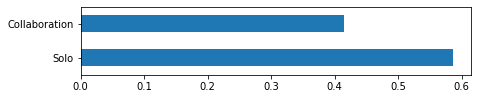

In [16]:
# Frequência em um gráfico de barras
(
df['song_type'].value_counts(normalize=True)
.plot.barh(figsize=(7, 1.25))
)

<a id="distribuicoes"></a>
## Distribuições

Estatísticas básicas para variáveis numéricas como média, mediana e variância são um bom ponto de partida para compreender conjuntos de dados. No entanto, elas não são suficientes para descrever totalmente esses dados, pois dados completamente diferentes podem ter a mesma média, por exemplo. Dessa forma, é necessário aprofundar a análise olhando para a distribuição, que de forma geral apresenta a frequência com que os valores aparecem no conjunto de dados. Nesta seção, são apresentadas duas das principais formas de se visualizar distribuições de valores: *boxplots* e histogramas.

<a id="boxplots"></a>
### Boxplots

Também conhecidos como *diagramas de caixa* (embora a versão em inglês seja mais utilizada), são uma forma padronizada e visual de sumarizar a distribuição de uma variável através de seus quartis: primeiro (Q1), segundo (Q2, mediana) e terceiro (Q3). Além deles, um *boxplot* também exibe outras informações importantes, como o intervalo interquartil (IQR) e *outliers*. As principais definições necessárias para entender um *boxplot* estão a seguir:  

- **Mediana (Q2, 50º percentil)**: o valor "do meio" do conjunto de dados;
- **Primeiro quartil (Q1, 25º percentil)**: valor abaixo do qual se encontra os primeiros 25% dos valores do conjunto de dados (ordenados do menor para o maior);
- **Terceiro quartil (Q3, 75º percentil)**: valor abaixo do qual se encontra os primeiros 75% dos valores do conjunto de dados (ordenados do menor para o maior);
- **Intervalo interquartil (IQR)**: intervalo entre o 25º e o 75º percentis.

Então, um *boxplot* para uma variável consiste de uma caixa cujas extremidades vão do primeiro ao terceiro quartil (Q1 a Q3), com uma linha indicando a mediana (Q2). Além disso, este tipo de gráfico contém linhas ("bigodes") que saem das extremidades da caixa e possuem o comprimento de $1,5*IQR$. Todos os valores acima ou abaixo dos "bigodes" são classificados como *outliers*, e portanto são visualizados como círculos. 

Para exibir um *boxplot* para uma coluna de um *DataFrame* (ou uma *Series*), basta adicionar o comando `.plot.box()`. O exemplo a seguir mostra um *boxplot* para a coluna `danceability`, uma *feature* do Spotify que informa a probabilidade de uma música ser dançante.

<AxesSubplot:>

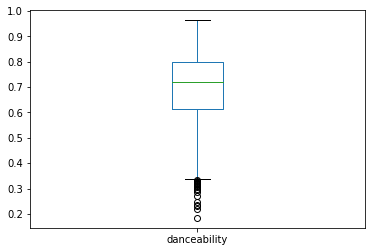

In [17]:
df['danceability'].plot.box() # Distribuição de valores da coluna 'danceability'

A partir deste exemplo, pode-se perceber que a maioria dos valores dessa coluna se encontra em um patamar acima de 0,5, ou seja, a maioria das músicas do nosso conjunto de dados possui um alto valor de `danceability` e portanto são bastante dançantes. Por outro lado, são poucas as músicas com valores baixos para esta métrica (*outliers*). Como nosso conjunto de dados compreende músicas que entraram nas paradas de sucesso do Spotify em 2020, pode-se afirmar que a maioria dos *hits* são músicas dançantes.

*Boxplots* também podem servir para comparar distribuições de duas ou mais variáveis, e a estrutura de *DataFrame* do Pandas permite fazer tais comparações de forma simples. A seguir, são comparadas as colunas de `danceability` e `acousticness`, que informa a probabilidade de uma música ser acústica.  

<AxesSubplot:>

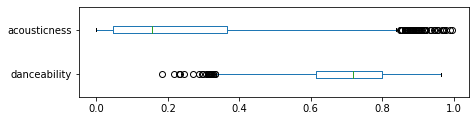

In [18]:
# Distribuição das colunas
#  'danceability' e 'acousticness'

df[[
    'danceability',
    'acousticness'
]].plot.box(vert=False, figsize=(7, 1.65)) 

Neste gráfico, os valores de `acousticness` estão em sua maioria abaixo de 0,5, com poucos *outliers* com valores altos. Completanto a conclusão feita a partir da *feature* `danceability`, pode-se afirmar que a maioria dos hits, além de serem dançantes, são não-acústicas (geralmente gravadas em estúdio).

<a id="histogramas"></a>
### Histogramas

Em linhas gerais, um histograma é uma representação da distribuição de dados numéricos, mostrando a frequência dos valores que ocorrem em um conjunto de dados. O intervalo em que os valores ocorrem é dividido em partes iguais (*bins*) cujo tamanho pode ser especificado pela pessoa analista, e a quantidade de valores que estão em cada uma dessas partes é representada por barras. Diferentemente dos gráficos de barras, histogramas não possuem espaços entre as barras por representarem valores em um espectro contínuo.

No Pandas, um histograma de valores é facilmente construído adicionando o comando `.hist()` em um *DataFrame* ou *Series*. Assim como para os *boxplots*, construímos a seguir histogramas com a distribuição de valores das colunas `danceability` e `acousticness` do conjunto de músicas que entraram nas paradas globais do Spotify. Observe que as mesmas conclusões dos *boxplots* podem ser obtidas a partir dos histogramas, por serem duas formas diferentes de visualizar a mesma informação, i.e., a distribuição dos valores. 

<AxesSubplot:>

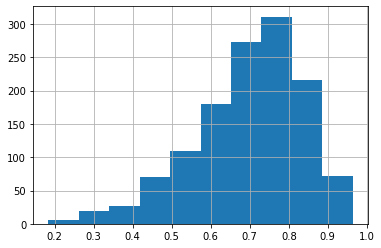

In [19]:
df['danceability'].hist() # Histograma de valores de 'danceability'

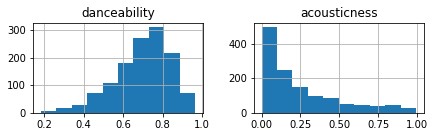

In [20]:
# Histograma de valores de 
#  'danceability' e 'acousticness'

df[[
    'danceability',
    'acousticness'
]].hist(figsize=(7, 1.65));

<a id="correlacoes"></a>
## Correlações

Em estatística, a correlação é uma métrica que informa o grau em que duas ou mais variáveis estão relacionadas entre si. A correlação entre variáveis pode ser medida por um coeficiente, cujo valore varia entre -1 e 1. Uma correlação é dita **totalmente positiva** quando o coeficiente é exatamente igual a 1. De forma similar, um coeficiente de correlação igual a -1 indica uma correlação **totalmente negativa**. Valores de correlação iguais a zero informam que não existe correlação explícita entre as variáveis consideradas. Existem várias formas de se calcular coeficientes de correlação, dentre as quais pode-se eleger dois principais:

- Pearson ($r$): mede a correlação linear (de primeira ordem) entre variáveis;
- Spearman ($\rho$): mede correlação monotônica entre variáveis, i.e., utiliza a ordem dos dados ao invés dos valores em si;

Para calcular correlações, o Pandas dispõe da função `corr()`, que pode ser facilmente aplicada tanto para *Series* quanto para *DataFrame*. No exemplo a seguir, é calculado o valor do coeficiente de Pearson para as colunas `energy` e `loudness`, que medem a intensidade de uma música e a altura medida em decibéis (dB), respectivamente.

In [21]:
# Correlação de Pearson entre as colunas energy e loudness
df['energy'].corr(other=df['loudness'], method='pearson')  

0.7371095489903126

A partir deste resultado, pode-se dizer que a correlação linear entre essas duas variáveis e forte e positiva, pois o valor de $0.737$ é muito próximo de 1. Ou seja, à medida em que o valor de `energy` aumenta, o valor de `loudness` também segue essa tendência, e vice-versa. É importante ressaltar que correlação não necessariamente implica causalidade, e portanto não é possível afirmar que uma coisa acontece por causa da outra, mas sim que ambas ocorrem juntas.

Além disso, cientistas de dados frequentemente calculam correlações entre mais de duas variáveis para ter uma visão mais global de algum fenômeno. Para isso, **matrizes de correlação** são bastante úteis, pois permitem uma fácil e rápida visualização em única estrutra de dados. Em uma matriz de correlação $M$, as linhas e colunas são as variáveis para as quais se deseja observar a correlação, e os valores $m_{ij}$ representam a correlação entre as variáveis $i$ e $j$. A diagonal principal dessas matrizes é sempre igual a 1, pois a correlação entre uma variável e ela mesma é total. A seguir, é mostrada a matriz de correlação entre algumas *features* acústicas das música, isto é, obtidas do áudio da canção.

In [22]:
# Construção da matriz de correlação para features acústicas
acoustic_features = ['acousticness', 'danceability', 'energy', 'instrumentalness','loudness', 'valence']
df[acoustic_features].corr(method='spearman')    # Aqui, vamos utilizar a correlação de Spearman

,acousticness,danceability,energy,instrumentalness,loudness,valence
acousticness,1.000000,-0.210552,-0.427403,-0.007332,-0.313412,-0.034162
danceability,-0.210552,1.000000,0.051333,-0.017828,0.149479,0.312837
energy,-0.427403,0.051333,1.000000,0.009851,0.703220,0.343683
instrumentalness,-0.007332,-0.017828,0.009851,1.000000,-0.130229,-0.133157
loudness,-0.313412,0.149479,0.703220,-0.130229,1.000000,0.330416
valence,-0.034162,0.312837,0.343683,-0.133157,0.330416,1.000000


Nesta matriz, utiliza-se a correlação de Spearman entre as colunas do *DataFrame*. O tipo de correlação pode ser definido através do parâmetro `method`. Além dos coeficientes de Pearson e Spearman, a função `corr()` do Pandas também permite calcular a correlação de Kendall ($\tau$), que também é baseada na ordem das variáveis.

Como pode ser notado nos tópicos mencionados acima, a análise exploratória dos dados possui uma grande interseção com a etapa de visualização de dados. Isso se deve ao fato de muitas ferramentas de análise de dados produzem gráficos como resultado, como por exemplo histogramas, gráficos de caixa (*boxplots*), dentre outros. No entanto, o objetivo desta seção é apenas apresentar as principais funções do Pandas e outras bibliotecas que nos auxiliam na exploração dos dados, ou seja, o foco aqui reside na análise destes dados. As informações detalhadas sobre os diferentes tipos de visualizações e como personalizá-las são abordadas nos próximos notebooks (referentes à seção de visualização de dados). 

## Conclusão

Este notebook apresentou o básico da ciência de dados com análise exploratória.

O próximo notebook ([5.2.Quantidade.ipynb](5.2.Quantidade.ipynb)) apresenta como representar graficamente informações de quantidade.